## Upload dataset

In [ ]:
# Run code on Colab
from google.colab import files
import pandas as pd
import io

uploaded = files.upload()

Saving Cardiovascular Event Dataset.csv to Cardiovascular Event Dataset.csv


In [ ]:
# Read the dataset into a Pandas DataFrame
df = pd.read_csv(io.BytesIO(uploaded['Cardiovascular Event Dataset.csv']))

#Ensure correct dataset is being inputted
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import warnings
import plotly.express as px
import plotly.io as pio
pio.renderers.default='notebook'
import statsmodels.api as sm

warnings.filterwarnings('ignore')

# Initial analysis

In [ ]:
# Getting the shape of the dataframe
print(df.shape)

(5110, 12)


In [ ]:
# List the columns of the dataframe
print(df.columns)

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


In [ ]:
# Check for missing values in the dataset
print(df.isna().sum())

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [ ]:
# Display the data types of each column
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

## Descriptive statistics

In [ ]:
# Display overall summary statistics
print(df.describe())

                 id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000000  
75%           114.090000    33.100000     0

In [ ]:
# Subset the data where 'Female' is True
female_df = df[df['gender'] == 0]

# Display summary statistics for females
print(female_df.describe())

       gender          age  hypertension  ever_married    work_type  \
count  2994.0  2994.000000   2994.000000   2994.000000  2994.000000   
mean      0.0    43.757395      0.092184      0.668337     3.571476   
std       0.0    21.966561      0.289334      0.470889     1.225523   
min       0.0     0.080000      0.000000      0.000000     1.000000   
25%       0.0    27.000000      0.000000      0.000000     4.000000   
50%       0.0    44.000000      0.000000      1.000000     4.000000   
75%       0.0    61.000000      0.000000      1.000000     4.000000   
max       0.0    82.000000      1.000000      1.000000     5.000000   

       Residence_type  avg_glucose_level       stroke  heart_disease  
count     2994.000000        2994.000000  2994.000000    2994.000000  
mean         0.510688         104.057809     0.047094       0.037742  
std          0.499969          43.590651     0.211876       0.190604  
min          0.000000          55.120000     0.000000       0.000000  
25%  

In [ ]:
# Subset the data where 'Male' is True
male_df = df[df['gender'] == 1]

# Display summary statistics for males
print(male_df.describe())

       gender          age  hypertension  ever_married    work_type  \
count  2115.0  2115.000000   2115.000000   2115.000000  2115.000000   
mean      1.0    42.483385      0.104965      0.639243     3.387707   
std       0.0    23.484066      0.306580      0.480334     1.343205   
min       1.0     0.080000      0.000000      0.000000     1.000000   
25%       1.0    22.000000      0.000000      0.000000     2.000000   
50%       1.0    46.000000      0.000000      1.000000     4.000000   
75%       1.0    61.000000      0.000000      1.000000     4.000000   
max       1.0    82.000000      1.000000      1.000000     5.000000   

       Residence_type  avg_glucose_level       stroke  heart_disease  
count     2115.000000         2115.00000  2115.000000    2115.000000  
mean         0.504492          109.08852     0.051064       0.077069  
std          0.500098           47.43484     0.220180       0.266763  
min          0.000000           55.22000     0.000000       0.000000  
25%  

# Data pre-processing

### Convert gender column to binary

In [ ]:
# Using the replace() function to transform the 'gender' column
df['gender'] = df['gender'].replace({'Male': 1, 'Female': 0, 'Other': 2})

# Display the first few rows to see the transformation
df.head()

,gender,age,hypertension,ever_married,work_type,Residence_type,avg_glucose_level,stroke,heart_disease
0,1,67.0,0,1,4,1,228.69,1,1
1,0,61.0,0,1,5,0,202.21,1,0
2,1,80.0,0,1,4,0,105.92,1,1
3,0,49.0,0,1,4,1,171.23,1,0
4,0,79.0,1,1,5,0,174.12,1,0


### Convert ever_married column to binary

In [ ]:
# Using the replace() function to transform the 'ever_married' column
df['ever_married'] = df['ever_married'].replace({'Yes': 1, 'No': 0})

# Display the first few rows to see the transformation
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,0,61.0,0,0,1,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,1,80.0,0,1,1,Private,Rural,105.92,32.5,never smoked,1
3,60182,0,49.0,0,0,1,Private,Urban,171.23,34.4,smokes,1
4,1665,0,79.0,1,0,1,Self-employed,Rural,174.12,24.0,never smoked,1


### Convert work_type column to int

In [ ]:
# Using the replace() function to transform the 'work_type' column
df['work_type'] = df['work_type'].replace({'children': 1, 'Govt_job': 2, 'Never_worked': 3, 'Private': 4, 'Self-employed': 5})

# Display the first few rows to see the transformation
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,4,Urban,228.69,36.6,formerly smoked,1
1,51676,0,61.0,0,0,1,5,Rural,202.21,NaN,never smoked,1
2,31112,1,80.0,0,1,1,4,Rural,105.92,32.5,never smoked,1
3,60182,0,49.0,0,0,1,4,Urban,171.23,34.4,smokes,1
4,1665,0,79.0,1,0,1,5,Rural,174.12,24.0,never smoked,1


### Convert Residence_type column to binary

In [ ]:
# Using the replace() function to transform the 'Residence_type' column
df['Residence_type'] = df['Residence_type'].replace({'Urban': 1, 'Rural': 0})

# Display the first few rows to see the transformation
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,4,1,228.69,36.6,formerly smoked,1
1,51676,0,61.0,0,0,1,5,0,202.21,NaN,never smoked,1
2,31112,1,80.0,0,1,1,4,0,105.92,32.5,never smoked,1
3,60182,0,49.0,0,0,1,4,1,171.23,34.4,smokes,1
4,1665,0,79.0,1,0,1,5,0,174.12,24.0,never smoked,1


## Convert NaN values in BMI to median value

In [ ]:
df[['bmi']] = df[['bmi']].replace(0, np.nan)
df.fillna(df.median(), inplace=True)

df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,4,1,228.69,36.6,formerly smoked,1
1,51676,0,61.0,0,0,1,5,0,202.21,28.1,never smoked,1
2,31112,1,80.0,0,1,1,4,0,105.92,32.5,never smoked,1
3,60182,0,49.0,0,0,1,4,1,171.23,34.4,smokes,1
4,1665,0,79.0,1,0,1,5,0,174.12,24.0,never smoked,1


### Check data types to ensure there are no strings

In [ ]:
# Display the data types of each column
df.dtypes

id                     int64
gender               float64
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int64
work_type              int64
Residence_type         int64
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

## Drop smoking status column since there is too much categorical data missing

In [ ]:
df.drop('smoking_status', axis=1, inplace=True)

df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke
0,9046,1,67.0,0,1,1,4,1,228.69,36.6,1
1,51676,0,61.0,0,0,1,5,0,202.21,28.1,1
2,31112,1,80.0,0,1,1,4,0,105.92,32.5,1
3,60182,0,49.0,0,0,1,4,1,171.23,34.4,1
4,1665,0,79.0,1,0,1,5,0,174.12,24.0,1


## Initial count

### Ever married status and have heart disease status

In [ ]:
#Count number of individuals in ever married status
married_yes_count = df['ever_married'].value_counts()[1]
married_no_count = df['ever_married'].value_counts()[0]

print('Number of people that have ever been married:', married_yes_count)
print('Number of people that have never ever been married:', married_no_count)

#Count number of individuals in had heart disease status
heart_disease_yes_count = df['heart_disease'].value_counts()[1]
heart_disease_no_count = df['heart_disease'].value_counts()[0]

print('Number of people that have heart disease:', heart_disease_yes_count)
print('Number of people that do not have heart disease:', heart_disease_no_count)

Number of people that have ever been married: 3353
Number of people that have never ever been married: 1757
Number of people that have heart disease: 276
Number of people that do not have heart disease: 4834


## Initial visualization of data using histograms

### 1. Distribution of ever married status among users

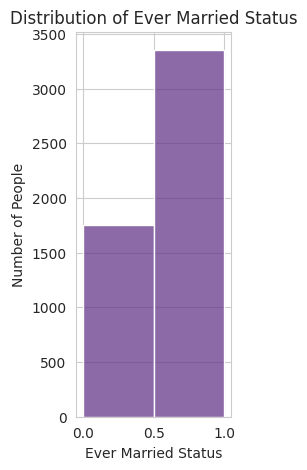

In [ ]:
# Set the style for seaborn
sns.set_style('whitegrid')

# Create a histogram for the 'Age' feature
plt.figure(figsize=(2, 5))
sns.histplot(df['ever_married'], bins=2, kde=False, color='#66378a')
plt.title('Distribution of Ever Married Status')
plt.xlabel('Ever Married Status')
plt.ylabel('Number of People')
plt.show()

### 2. Distribution of have heart disease among users

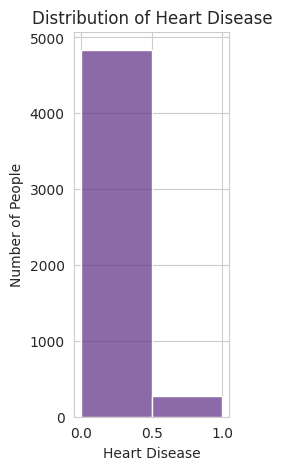

In [ ]:
# Set the style for seaborn
sns.set_style('whitegrid')

# Create a histogram for the 'Age' feature
plt.figure(figsize=(2, 5))
sns.histplot(df['heart_disease'], bins=2, kde=False, color='#66378a')
plt.title('Distribution of Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Number of People')
plt.show()

### 3. Distribution of gender and ever married among users

Text(0, 0.5, 'Number of People')

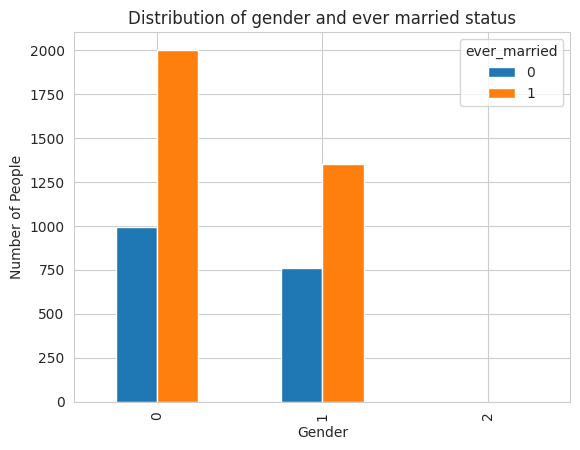

In [ ]:
%matplotlib inline
pd.crosstab(df.gender,df.ever_married).plot(kind='bar')
plt.title('Distribution of gender and ever married status')
plt.xlabel('Gender')
plt.ylabel('Number of People')

## Move outcome (heart disease) to end

In [ ]:
df = df[['id', 'gender', 'age', 'hypertension', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'stroke', 'heart_disease']]
df.head()

,id,gender,age,hypertension,ever_married,work_type,Residence_type,avg_glucose_level,stroke,heart_disease
0,9046,1,67.0,0,1,4,1,228.69,1,1
1,51676,0,61.0,0,1,5,0,202.21,1,0
2,31112,1,80.0,0,1,4,0,105.92,1,1
3,60182,0,49.0,0,1,4,1,171.23,1,0
4,1665,0,79.0,1,1,5,0,174.12,1,0


## Data exploration

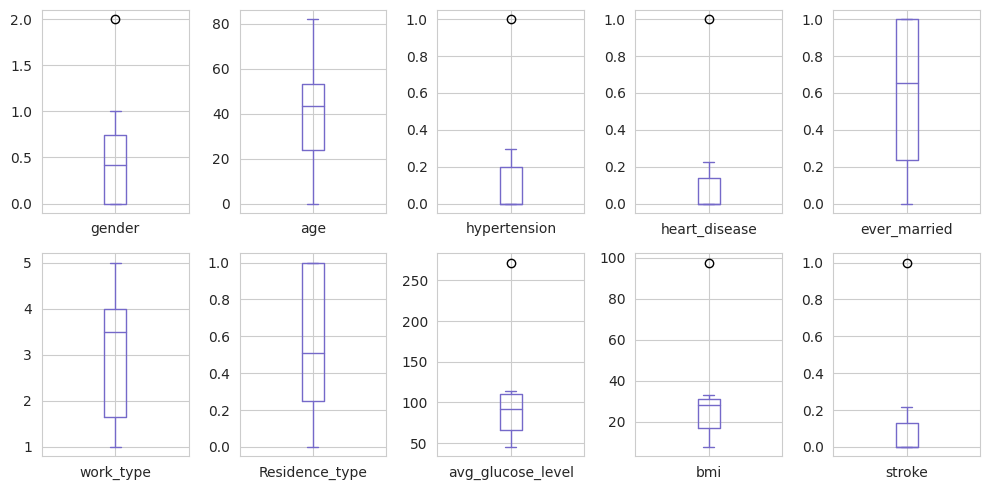

In [ ]:
description = df.describe()
description

# Drop the 'count' row for better visualization
description = description.drop('count')
description = description.drop('id', axis=1)

# Visual representation of data.describe()
description.plot(kind='box', subplots=True, layout=(2, 5), figsize=(10, 5), color='#7569c9')
plt.tight_layout()
plt.show()

## Pair plots

In [ ]:
df.drop('id', axis=1, inplace=True)

df.head()

,gender,age,hypertension,ever_married,work_type,Residence_type,avg_glucose_level,stroke,heart_disease
0,1,67.0,0,1,4,1,228.69,1,1
1,0,61.0,0,1,5,0,202.21,1,0
2,1,80.0,0,1,4,0,105.92,1,1
3,0,49.0,0,1,4,1,171.23,1,0
4,0,79.0,1,1,5,0,174.12,1,0


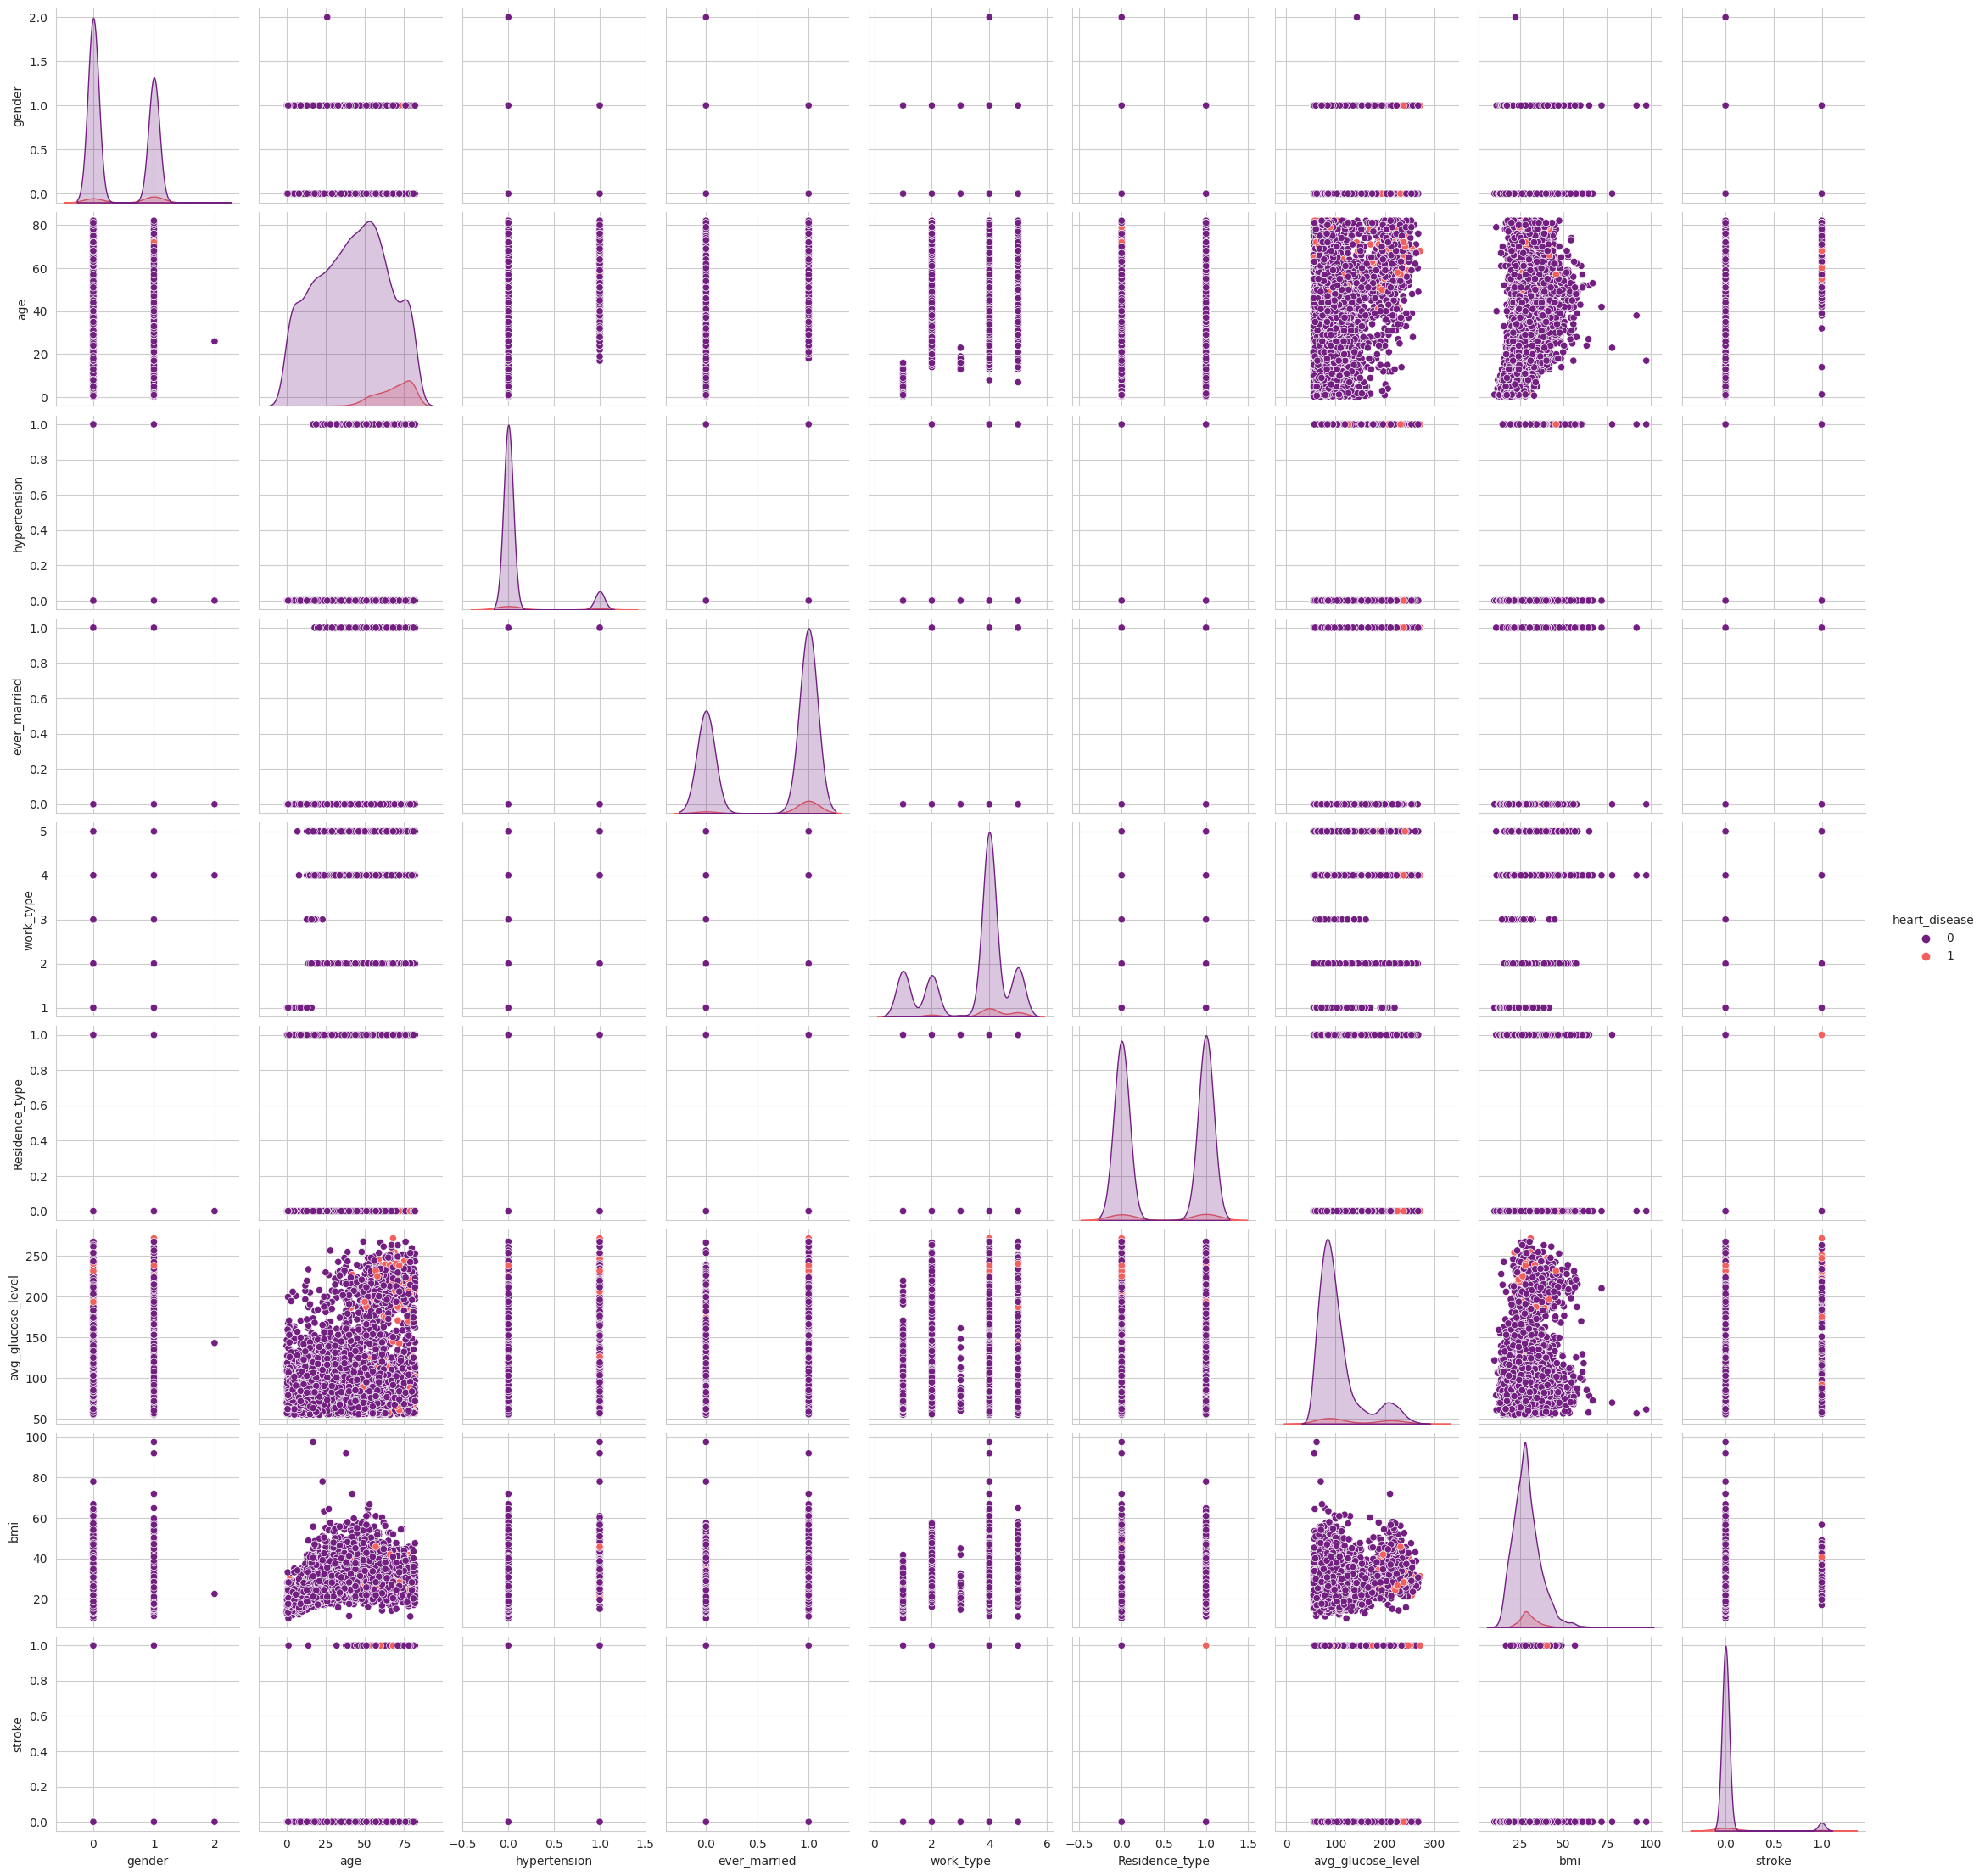

In [ ]:
# Display pair plot for data visualization
sns.pairplot(df, hue='heart_disease', palette="magma")
plt.show()

## Drop id from logistic regression

## Preparing data

In [ ]:
# Split the data into features and target variable
X = df.drop('heart_disease', axis=1)
y = df['heart_disease']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizing data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Building logistic regression model

In [ ]:
# Training logistic regression model
log_reg = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')
log_reg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [ ]:
# Use the model to make predictions on the testing data
y_pred = log_reg.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[961   1]
 [ 60   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       962
           1       0.00      0.00      0.00        60

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.89      0.94      0.91      1022



## Visualizing confusion matrix

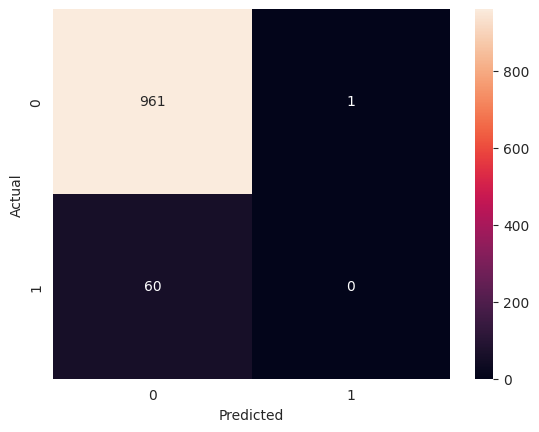

In [ ]:
# Visualizing confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## Logistic regression plots

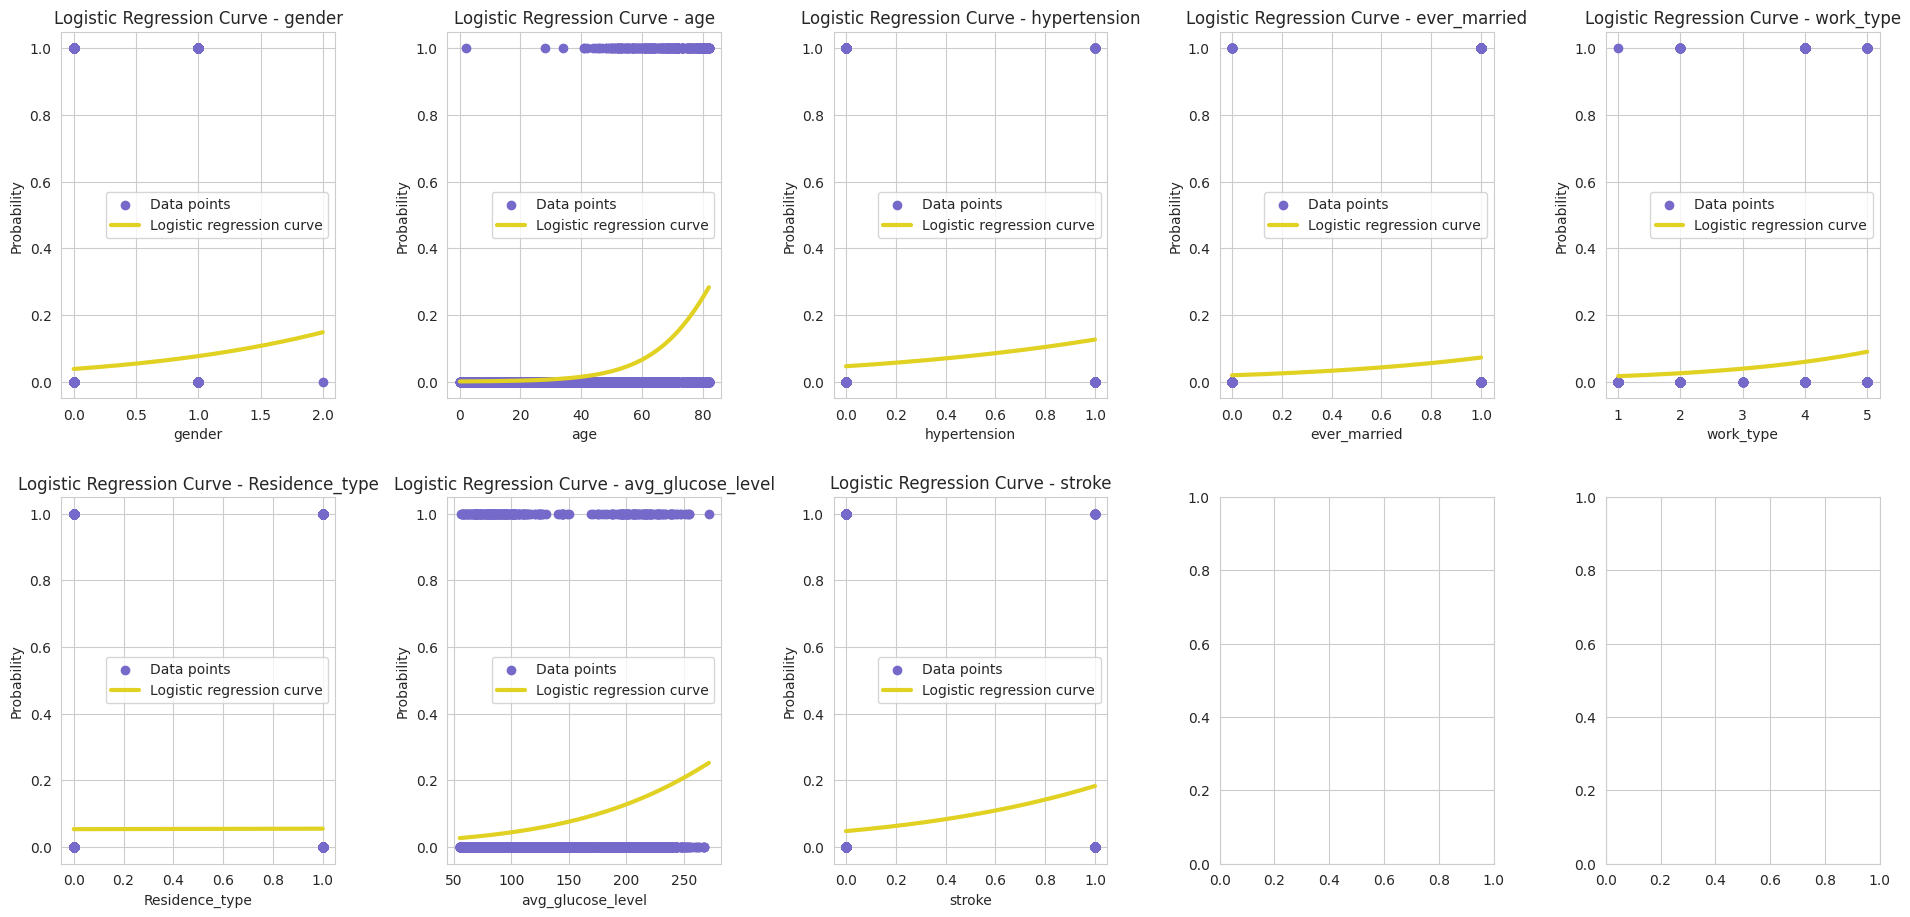

In [ ]:
# Create logistic regression object
log_reg = LogisticRegression()

fig, axs = plt.subplots(2, 5, figsize=(20, 10))
fig.tight_layout(pad=5.0)  # Adds padding between subplots

for i, feature in enumerate(df.columns[:-1]):  # Exclude 'heart_disease' column
    row = i // 5  # Determine row index
    col = i % 5   # Determine column index

    # Reshape the feature and outcome arrays to fit the model
    X = df[[feature]]
    y = df['heart_disease']

    # Fit logistic regression model
    log_reg.fit(X, y)

    # Get min and max values of the feature for plotting
    x_test = np.linspace(X.min(), X.max(), 300)

    # Get the probability for each value in the range
    prob = log_reg.predict_proba(x_test)[:, 1]

    # Plot the data points
    axs[row, col].scatter(X, y, color='#7569c9', label='Data points')

    # Plot the sigmoid curve
    axs[row, col].plot(x_test, prob, color='#e0d122', lw=3, label='Logistic regression curve' )

    axs[row, col].set_title(f'Logistic Regression Curve - {feature}')
    axs[row, col].set_xlabel(feature)
    axs[row, col].set_ylabel('Probability')
    axs[row, col].legend()

plt.show()

## Logistic regression model summary

In [ ]:
# Separate features and target variable
X = df.drop('heart_disease', axis=1)
y = df['heart_disease']

# Add a constant term for the intercept
X = sm.add_constant(X)

# Create and fit logistic regression model
log_reg = sm.Logit(y, X).fit()

# Get summary report
summary = log_reg.summary()
print(summary)

Optimization terminated successfully.
         Current function value: 0.160160
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:          heart_disease   No. Observations:                 5110
Model:                          Logit   Df Residuals:                     5101
Method:                           MLE   Df Model:                            8
Date:                Tue, 03 Oct 2023   Pseudo R-squ.:                  0.2379
Time:                        15:53:09   Log-Likelihood:                -818.42
converged:                       True   LL-Null:                       -1073.9
Covariance Type:            nonrobust   LLR p-value:                3.035e-105
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -8.0370      0.441    -18.219      0.000      -8.902      -7.172
gender  

In [ ]:
female_df.drop('gender', axis=1, inplace=True)

female_df.head()


,age,hypertension,ever_married,work_type,Residence_type,avg_glucose_level,stroke,heart_disease
1,61.0,0,1,5,0,202.21,1,0
3,49.0,0,1,4,1,171.23,1,0
4,79.0,1,1,5,0,174.12,1,0
7,69.0,0,0,4,1,94.39,1,0
8,59.0,0,1,4,0,76.15,1,0


In [ ]:
male_df.drop('gender', axis=1, inplace=True)

male_df.head()

,age,hypertension,ever_married,work_type,Residence_type,avg_glucose_level,stroke,heart_disease
0,67.0,0,1,4,1,228.69,1,1
2,80.0,0,1,4,0,105.92,1,1
5,81.0,0,1,4,1,186.21,1,0
6,74.0,1,1,4,0,70.09,1,1
13,78.0,0,1,4,1,219.84,1,1


In [ ]:
###Stratified analysis for gender = Female####

# Split the data into features and target variable
X = female_df.drop('heart_disease', axis=1)
y = female_df['heart_disease']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizing data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Training logistic regression model
log_reg = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')
log_reg.fit(X_train, y_train)

# Use the model to make predictions on the testing data
y_pred = log_reg.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Separate features and target variable
X = female_df.drop('heart_disease', axis=1)
y = female_df['heart_disease']

# Add a constant term for the intercept
X = sm.add_constant(X)

# Create and fit logistic regression model
log_reg = sm.Logit(y, X).fit()

# Get summary report
summary = log_reg.summary()
print(summary)

Confusion Matrix:
[[582   0]
 [ 17   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       582
           1       0.00      0.00      0.00        17

    accuracy                           0.97       599
   macro avg       0.49      0.50      0.49       599
weighted avg       0.94      0.97      0.96       599

Optimization terminated successfully.
         Current function value: 0.122339
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:          heart_disease   No. Observations:                 2994
Model:                          Logit   Df Residuals:                     2986
Method:                           MLE   Df Model:                            7
Date:                Tue, 03 Oct 2023   Pseudo R-squ.:                  0.2387
Time:                        15:17:21   Log-Likelihood:                -366.28
converged:                      

In [ ]:
####Stratified analysis for gender = Male #####

# Split the data into features and target variable
X = male_df.drop('heart_disease', axis=1)
y = male_df['heart_disease']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizing data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Training logistic regression model
log_reg = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')
log_reg.fit(X_train, y_train)

# Use the model to make predictions on the testing data
y_pred = log_reg.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Separate features and target variable
X = male_df.drop('heart_disease', axis=1)
y = male_df['heart_disease']

# Add a constant term for the intercept
X = sm.add_constant(X)

# Create and fit logistic regression model
log_reg = sm.Logit(y, X).fit()

# Get summary report
summary = log_reg.summary()
print(summary)

Confusion Matrix:
[[396   0]
 [ 26   1]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       396
           1       1.00      0.04      0.07        27

    accuracy                           0.94       423
   macro avg       0.97      0.52      0.52       423
weighted avg       0.94      0.94      0.91       423

Optimization terminated successfully.
         Current function value: 0.211525
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:          heart_disease   No. Observations:                 2115
Model:                          Logit   Df Residuals:                     2107
Method:                           MLE   Df Model:                            7
Date:                Tue, 03 Oct 2023   Pseudo R-squ.:                  0.2210
Time:                        15:18:24   Log-Likelihood:                -447.38
converged:                      